# Destinatik: Pre-processing Data

In [1]:
#untuk pengolahan data
import pandas as pd
import numpy as np
from pathlib import Path
#untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
#untuk pemodelan
import tensorflow as tf
#untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')


In [2]:
# download the zipped dataset to the data directory
# package_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/package_tourism.csv"
# rating_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/tourism_rating.csv"
# tourId_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/tourism_with_id.csv"
# user_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/user.csv"

# download_dir = './datasets/'
# download_list = [package_url, rating_url, tourId_url, user_url]

# for data_url in download_list:
#     urllib.request.urlretrieve(data_url)

In [3]:
# package_file = './datasets/package_tourism.csv'
# rating_file = './datasets/tourism_rating.csv'
# tourId_file = './datasets/tourism_with_id.csv'
# user_file = './datasets/user.csv'

# package_df = pd.read_csv(package_file)
# rating_df = pd.read_csv(rating_file)
# tourId_df = pd.read_csv(tourId_file)
# user_df = pd.read_csv(user_file)

Dataset Link: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data

Use This code if you're using Google Colab.

# Import Library

In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indonesia-tourism-destination:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1481754%2F2448367%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240531%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240531T043526Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0bc5327cf707b130e5f7e67299ee6d486dddbd1a7b31372286a88a02e1ee79c26211235a335f2b657d0a43334e0b1e73c62e2e927f3d07ec41717ce1b2f7ccc5895f8cc7798ee4c7198db1ac055889918eeda69bb363359979e4b074d34b4e85702e66f40106113388a56d561099437dcea0ea688ad681669bb06c3b1e69508b11bc20a4ac925716546b7fe7c1f4799155f973ac74c72641f72733cbbed8118eaf1c593f6eaa352417540c9aee7a9ab82d223d90a10bed53b6049b3c7a51784b6d1da1eddd4e2d3d39dd35569ef37c0d53815b03d6912cae2093f83dd19710b51492132b71fe4c2a8abb6cbd02ba066985597e4e7af904805df25e38780e1270'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 162193 bytes downloaded
Downloaded and uncompressed: indonesia-tourism-destination
Data source import complete.


# Data Understanding


In [5]:
import pandas as pd
DATA_PATH = "../input/indonesia-tourism-destination"
package_df = pd.read_csv(f"{DATA_PATH}/package_tourism.csv")
tourId_df = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
rating_df = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
user_df = pd.read_csv(f"{DATA_PATH}/user.csv")

# Data Wrangling:
### Assessing Data

In [6]:
package_df.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [7]:
package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


Checking missing value in package_df

In [8]:
package_df.isna().sum()

Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

In [9]:
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [10]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Checking missing value in rating_df

In [11]:
rating_df.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", rating_df.duplicated().sum())
rating_df.describe()

#duplicated file is okay, since it was rating (it can be used with median)

Jumlah duplikasi:  79


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [13]:
tourId_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [14]:
tourId_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Checking missing value in tourId_df

In [15]:
tourId_df.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", tourId_df.duplicated().sum())
tourId_df.describe()

Jumlah duplikasi:  0


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [17]:
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [18]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Checking missing value in user_df

In [19]:
user_df.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", user_df.duplicated().sum())
user_df.describe()

Jumlah duplikasi:  0


,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


# Data Wrangling:
### Cleaning Data

Drop the column unnamed: 11 and 12 in tourId_df and Time_Minutes (unnecessary)

In [21]:
# tourId_df = tourId_df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes'])
# tourId_df.info()

# Exploratory Data Analysis (EDA)

In [22]:
package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [23]:
tourId_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [24]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [25]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [26]:
user_df.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [27]:
tourId_df.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [28]:
import numpy as np

tourism_all = np.concatenate((
    tourId_df.Place_Id.unique(),
    rating_df.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [29]:
all_tourism_rate = rating_df
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [30]:
all_tourism = pd.merge(all_tourism_rate,tourId_df[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [31]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [32]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation
## Cleaning missing value

In [33]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [34]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [35]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [36]:
print(place_id)

[179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 197, 339, 35, 226

In [37]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "Tourism Name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,Tourism Name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


Median All

In [38]:
# rateBDG_df = rate_df[(rate_df['Place_Id'] >= 211) & (rate_df['Place_Id'] <= 334)]
# rateBDG_df

In [39]:
all_rating = rating_df.groupby(['Place_Id'])['Place_Ratings'].median().reset_index()
all_rating

,Place_Id,Place_Ratings
0,1,4.0
1,2,3.0
2,3,2.0
3,4,3.0
4,5,4.0
...,...,...
432,433,4.0
433,434,2.0
434,435,3.0
435,436,3.0


Create a new dataframe to specify the Bandung City dataframe (bandung_df)

In [40]:
bandung_df = tourId_df[tourId_df['City']=='Bandung']
bandung_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781,NaN,211
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984,NaN,212
212,213,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810,NaN,213
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,240.0,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494,NaN,214
214,215,Taman Hutan Raya Ir. H. Djuanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,15000,4.5,90.0,"{'lat': -6.8565791, 'lng': 107.6323734}",-6.856579,107.632373,NaN,215


Create a new dataframe to specify the Bandung City Place Rating dataframe (rateBDG_df)

In [41]:
rateBDG_df = rating_df[(rating_df['Place_Id'] >= 211) & (rating_df['Place_Id'] <= 334)]
rateBDG_df

,User_Id,Place_Id,Place_Ratings
5,1,312,2
6,1,258,5
17,1,292,3
18,1,222,3
22,1,246,4
...,...,...,...
9984,300,324,3
9986,300,323,1
9990,300,255,4
9997,300,311,3


Create a new dataframe to specify the Median of Bandung City Place Rating dataframe (rateBDGMed_df)

In [42]:
jakarta_df = tourId_df[tourId_df['City']=='Jakarta']
jakarta_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [43]:
semarang_df = tourId_df[tourId_df['City']=='Semarang']
semarang_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112,NaN,335
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394,NaN,336
336,337,Kampung Pelangi,Kampung pelangi atau dalam bahasa Inggris dise...,Taman Hiburan,Semarang,3000,4.3,30.0,"{'lat': -6.988881200000001, 'lng': 110.4083781}",-6.988881,110.408378,NaN,337
337,338,Lawang Sewu,"Lawang Sewu (""Seribu Pintu"") (bahasa Jawa: ꦭꦮꦁ...",Budaya,Semarang,10000,4.6,NaN,"{'lat': -6.9839099, 'lng': 110.4104342}",-6.983910,110.410434,NaN,338
338,339,Sam Poo Kong Temple,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Budaya,Semarang,35000,4.5,NaN,"{'lat': -6.996236599999999, 'lng': 110.398122}",-6.996237,110.398122,NaN,339


In [44]:
surabaya_df = tourId_df[tourId_df['City']=='Surabaya']
surabaya_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
391,392,Ekowisata Mangrove Wonorejo,Hutan Wisata Mangrove Surabaya merupakan wisat...,Cagar Alam,Surabaya,0,4.3,60.0,"{'lat': -7.308648199999999, 'lng': 112.8216622}",-7.308648,112.821662,NaN,392
392,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,NaN,393
393,394,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45.0,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,NaN,394
394,395,Taman Prestasi,Taman Prestasi Surabaya merupakan salah satu t...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.2614722, 'lng': 112.7428284}",-7.261472,112.742828,NaN,395
395,396,Monumen Kapal Selam,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Budaya,Surabaya,15000,4.4,30.0,"{'lat': -7.2654304, 'lng': 112.7503052}",-7.265430,112.750305,NaN,396


In [45]:
jogja_df = tourId_df[tourId_df['City']=='Yogyakarta']
jogja_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,NaN,85
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,NaN,86
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,NaN,87
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,NaN,88
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,NaN,89


# Encoding

**fungsi encoding**

**Encoding dan mapping**

In [46]:
import pandas as pd

# Example DataFrame
tourId_dfs = {'tourId_df': ['Place_Name', 'Category', 'City']}
all_tourism_enc = pd.DataFrame(tourId_dfs)

# Function to encode the user IDs
def user_encoder(column):
    unique_values = column.unique()
    value_to_encoded = {value: idx for idx, value in enumerate(unique_values)}
    encoded_to_value = {idx: value for idx, value in enumerate(unique_values)}
    return value_to_encoded, encoded_to_value

# Encoding user_id
user_to_user_encoded, user_encoded_to_user = user_encoder(all_tourism_enc['tourId_df'])

# Mapping user_id to encoded values
all_tourism_enc['tourId'] = all_tourism_enc['tourId_df'].map(user_to_user_encoded)

# Display the DataFrame
print(all_tourism_enc)


    tourId_df  tourId
0  Place_Name       0
1    Category       1
2        City       2


# Content Based Filtering

In [47]:
data = tourism_new
data.sample(5)

,id,Tourism Name,category,description,city,city_category
222,429,House of Sampoerna,Budaya,House of Sampoerna adalah sebuah museum tembak...,Surabaya,Surabaya Budaya
52,18,Museum Bank Indonesia,Budaya,Museum Bank Indonesia adalah sebuah museum di ...,Jakarta,Jakarta Budaya
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
229,46,Pulau Semak Daun,Bahari,Pulau Semak Daun merupakan salah satu pulau ya...,Jakarta,Jakarta Bahari
406,69,Freedom Library,Budaya,Freedom Library adalah perpustakaan buku yang ...,Jakarta,Jakarta Budaya


# Collaborative Filtering

In [48]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [51]:
dfs = rating_df
dfs

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


### Encode

In [54]:
user_ids = dfs.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [55]:
place_ids = dfs.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [58]:
dfs['user'] = dfs.User_Id.map(user_to_user_encoded)

dfs['place'] = dfs.Place_Id.map(place_to_place_encoded)

In [59]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

dfs['Place_Ratings'] = dfs['Place_Ratings'].values.astype(np.float32)

min_rating = min(dfs['Place_Ratings'])

max_rating= max(dfs['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


# Visualization

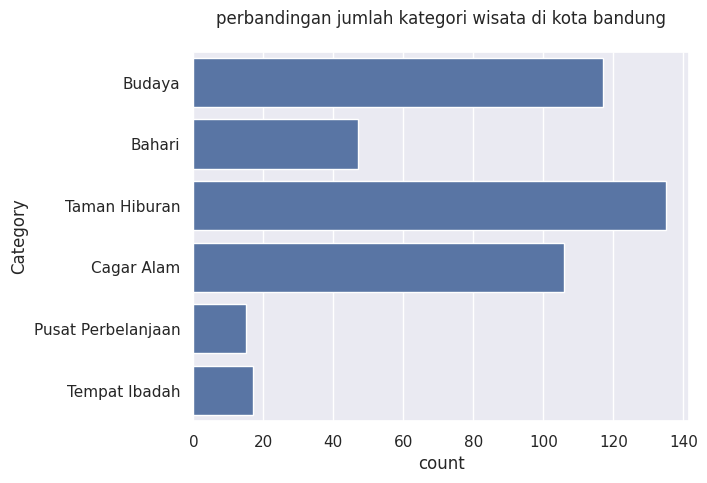

In [60]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('mako')
sns.set()
# preparation.Place_Name
sns.countplot(y='Category', data = preparation)
plt.title('perbandingan jumlah kategori wisata di kota bandung', pad=20)
plt.show()

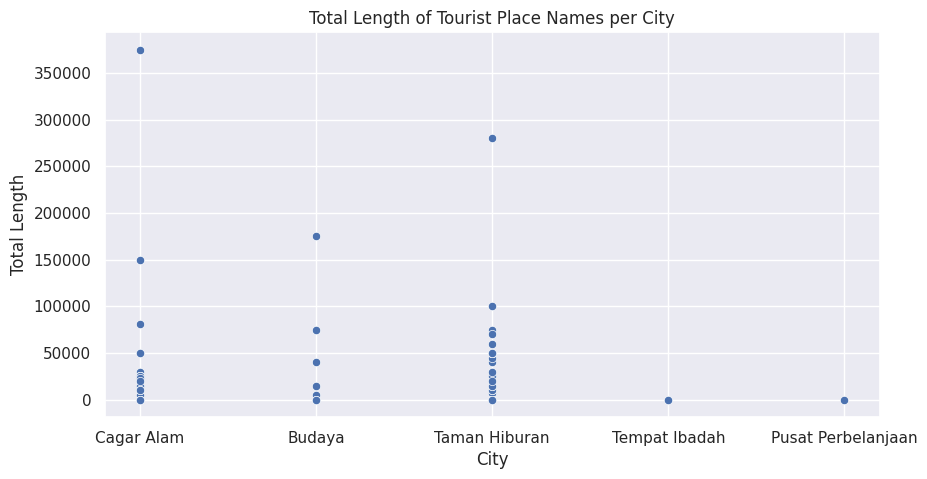

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
#plt.figure(figsize=(10, 6))


# Set the plot title and labels
#plt.title("Number of Tourist Places per Package")
#plt.xlabel("Number of Tourist Places")
#plt.ylabel("Count")

# Show the plot
#plt.show()

# Set the plot size
plt.figure(figsize=(10, 5))

# Create a box plot of the total length of tourist place names
sns.scatterplot(x="Category",y='Price', data=bandung_df)

# Set the plot title and labels
plt.title("Total Length of Tourist Place Names per City")
plt.xlabel("City")
plt.ylabel("Total Length")

# Show the plot
plt.show()